In [24]:
# logistic regression -> sigmoid fucntion based learning
import numpy as np
import cv2
from sklearn import metrics
from sklearn import datasets
from sklearn import linear_model
from sklearn import model_selection as modsel
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('ggplot')

In [25]:
# loading iris dataset
iris = datasets.load_iris()
dir(iris)

['DESCR', 'data', 'feature_names', 'target', 'target_names']

In [26]:
# data of 150 points with 4 features each are in iris dataset
print("iris data shape :", iris.data.shape)
print("iris target shape : ", iris.target.shape)

iris data shape : (150, 4)
iris target shape :  (150,)


In [27]:
# every iris.data has 4 feature associated with it
print("iris feature names : ", iris.feature_names)

iris feature names :  ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [28]:
# unique iris targets -> types that can be classified
np.unique(iris.target)

array([0, 1, 2])

In [29]:
# discrading the iris data of type iris.target[2]
idx = iris.target != 2
target = iris.target[idx].astype(np.float32)
data = iris.data[idx].astype(np.float32)

Text(0,0.5,'sepal width (cm)')

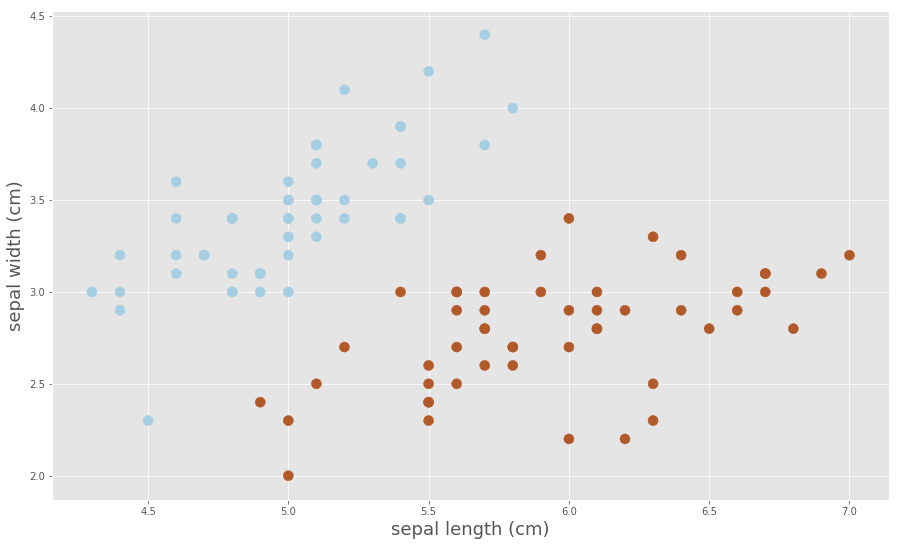

In [47]:
# ploting the first two features of iris.target[0 and 1]
plt.figure(figsize = (15, 9))
plt.scatter(data[:, 0], data[:, 1], c=target, cmap = plt.cm.Paired, s = 100)
plt.xlabel(iris.feature_names[0], size = 18)
plt.ylabel(iris.feature_names[1], size = 18)

In [31]:
# spliting the test and train dataset
x_train, x_test, y_train, y_test = modsel.train_test_split(data, target, test_size = 0.1, random_state = 42)

In [32]:
# 90% data for train
x_train.shape, y_train.shape

((90, 4), (90,))

In [33]:
# 10% data for test
x_test.shape, y_test.shape

((10, 4), (10,))

In [38]:
# creating the model
logreg = cv2.ml.LogisticRegression_create()
logreg.setTrainMethod(cv2.ml.LogisticRegression_MINI_BATCH)
logreg.setMiniBatchSize(1)
logreg.setIterations(100)

In [40]:
# training the model
logreg.train(x_train, cv2.ml.ROW_SAMPLE, y_train)

True

In [41]:
# logistic regression learnt weights and bias
logreg.get_learnt_thetas()

array([[-0.04109113, -0.01968079, -0.16216496,  0.2870491 ,  0.1194552 ]],
      dtype=float32)

In [43]:
# model prediction
ret, y_pred = logreg.predict(x_test)
metrics.accuracy_score(y_test, y_pred)

1.0